# kNN

In [ ]:
# Import numerical and dataframe handling
import pandas as pd
# import numpy as np

# Import plotting functionality
import matplotlib.pyplot as plt

# scikit-learn data utilities
from sklearn.model_selection import train_test_split

# Model scoring
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Import kNN
from sklearn.neighbors import KNeighborsRegressor

# Import other
# from sklearn.preprocessing import StandardScaler

## Data

In [ ]:
data = pd.read_csv('../data/parkinsons_updrs.data')

In [ ]:
max_val = 0
max_auc = 0
max_n = 0
val_acc = []
val_auc = []

## Regression

In [ ]:
features = ['sex','age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
features2 = data.loc[:,'Jitter(%)':'PPE']
features3 = ['age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
features4 = ['HNR', 'PPE', 'Shimmer:APQ11', 'age']
target = ['motor_UPDRS', 'total_UPDRS']

# X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=0)

def split_train_test_dataset(data,k,test_size):
    X_train, X_val, y_train, y_val = train_test_split(data[features], data[target], test_size=.2, random_state=0)

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)

    return r2_score(y_val,knn.predict(X_val))    

0.8524202597072703 6


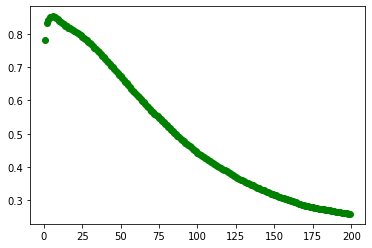

In [ ]:
val_acc = 0
max_score = 0
max_k = 0
test_size = 0.2

for k in range(1,200):
    # y_val_pred=knn.predict(x_val)
    # y_acc=accuracy_score(y_val,y_val_pred)
    # val_acc.append(y_acc)
    # y_val_pred_proba_knn=knn.predict_proba(X_val)

    score = split_train_test_dataset(data, k, test_size)
    plt.plot(k,score,color='green', linestyle='solid', linewidth = 3, 
         marker='o')
    if score > max_score:
        max_score = score
        max_k = k

print(max_score,max_k)
plt.show()

### Split by sex

In [ ]:
male = data[data['sex'] == 0]
female = data[data['sex'] == 1]

0.8524202597072703 6


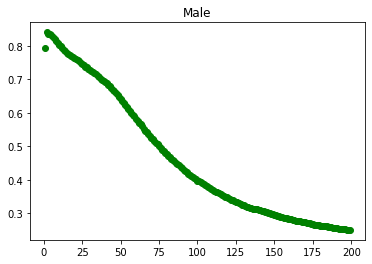

In [ ]:
plt.title('Male')
for k in range(1,200):
    # y_val_pred=knn.predict(x_val)
    # y_acc=accuracy_score(y_val,y_val_pred)
    # val_acc.append(y_acc)
    # y_val_pred_proba_knn=knn.predict_proba(X_val)

    score = split_train_test_dataset(male, k, test_size)
    plt.plot(k,score,color='green', linestyle='solid', linewidth = 3, 
         marker='o')
    if score > max_score:
        max_score = score
        max_k = k

print(max_score,max_k)
plt.show()

0.8632300230696799 4


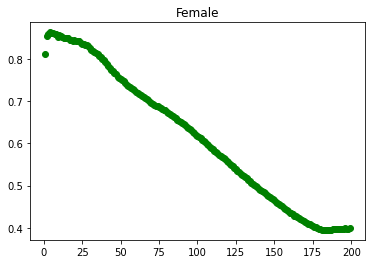

In [ ]:
plt.title('Female')
for k in range(1,200):
    # y_val_pred=knn.predict(x_val)
    # y_acc=accuracy_score(y_val,y_val_pred)
    # val_acc.append(y_acc)
    # y_val_pred_proba_knn=knn.predict_proba(X_val)

    score = split_train_test_dataset(female, k, test_size)
    plt.plot(k,score,color='green', linestyle='solid', linewidth = 3, 
         marker='o')
    if score > max_score:
        max_score = score
        max_k = k

print(max_score,max_k)
plt.show()

## Classification

In [ ]:
print(data.total_UPDRS.describe())
print(data.motor_UPDRS.describe())

# Going to set the following stages (total_UPDRS):
# I - [7, 21)
# II - [21, 27.5)
# III - [27.5, 36)
# IV - [36, 55)

stages = []
for i in range(data.shape[0]):
    updrs = data.iloc[i,5]

    if updrs >= 7 and updrs < 21:
        stages.append(1)
    elif updrs >= 21 and updrs < 27.5:
        stages.append(2)
    elif updrs >= 27.5 and updrs < 36:
        stages.append(3)
    else:
        stages.append(4)

data['Stages'] = stages
data['Stages'].value_counts()

count    5875.000000
mean       29.018942
std        10.700283
min         7.000000
25%        21.371000
50%        27.576000
75%        36.399000
max        54.992000
Name: total_UPDRS, dtype: float64
count    5875.000000
mean       21.296229
std         8.129282
min         5.037700
25%        15.000000
50%        20.871000
75%        27.596500
max        39.511000
Name: motor_UPDRS, dtype: float64


2    1545
4    1496
3    1450
1    1384
Name: Stages, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3b4f5ce-96b0-4815-84e4-80dc6a795abb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>